In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use(['ggplot'])

# Load all the datasets

In [32]:
df_Users = pd.read_csv("data/Users_data.csv")
df_Songs = pd.read_csv("data/Songs_data.csv")
df_Playlists = pd.read_csv("data/Playlists_data.csv")
df_Artists = pd.read_csv("data/Artists_data.csv")
df_Albums = pd.read_csv("data/Albums_data.csv")
df_Payments = pd.read_csv("data/Payments_data.csv")
df_User_subscriptions = pd.read_csv("data/User_subscriptions_data.csv")
df_Subscription_plan_info = pd.read_csv("data/Subscription_plan_info_data.csv")
df_Playlists_users = pd.read_csv("data/Playlists_users_data.csv")
df_Playlist_tracks = pd.read_csv("data/Playlist_tracks_data.csv")
df_Likes = pd.read_csv("data/Likes_data.csv")
df_Followers_users = pd.read_csv("data/Followers_users_data.csv")
df_Artists_followers = pd.read_csv("data/Artists_followers_data.csv")

df_Users.Name = "Users"
df_Songs.Name = "Songs"
df_Playlists.Name = "Playlists"
df_Artists.Name = "Artists"
df_Albums.Name = "Albums"
df_Payments.Name = "Payments"
df_User_subscriptions.Name = "User Subscriptions"
df_Subscription_plan_info.Name = "Subscription Plan Info"
df_Playlists_users.Name = "Playlists Users"
df_Playlist_tracks.Name = "Playlist Tracks"
df_Likes.Name = "Likes"
df_Followers_users.Name = "Followers Users"
df_Artists_followers.Name = "Artists Followers"

dataframes = [
    df_Users,
    df_Songs,
    df_Playlists,
    df_Artists,
    df_Albums,
    df_Payments,
    df_User_subscriptions,
    df_Subscription_plan_info,
    df_Playlists_users,
    df_Playlist_tracks,
    df_Likes,
    df_Followers_users,
    df_Artists_followers
]

1. Basic Descriptive Analyses

Total number of users, artists, albums, songs, playlists, and subscriptions.
Count of active versus deleted records for any entity (e.g., users, artists).
Summary statistics (mean, median, standard deviation) of numeric data like song durations, subscription prices, or payments.
Distribution of users by user_type (e.g., regular vs. premium).
Count of songs by genre or artist.

In [ ]:
# Total number of users, artists, albums, songs, playlists, subscriptions
for df in dataframes[:5]:
    print(f"Total number of instances in {df.Name}: \n {df["id"].nunique()}")

# Count of active versus deleted records
for df in dataframes:
    if "deleted" in df.columns:
        active_count = len(df[df["deleted"] == 0])
        deleted_count = len(df[df["deleted"] == 1])
        print(f"Number of active versus deleted in {df.Name}: \n Active: {active_count} Deleted: {deleted_count}")

# Summary statistics
for df in dataframes:
    print(f"Descriptive stats of {df.Name}: \n {df.describe()}")

# Distribution of users by user_type
user_type_counts = df_Users['user_type'].value_counts()

user_type_counts.plot(kind='bar')

plt.xlabel("User_type")
plt.ylabel("Count of users")
plt.title("Number of users based on user_type")

#Count of songs by genre, artist

df_songs_artists = df_Songs.merge(df_Artists, how="left", left_on="artist_id", right_on="id", suffixes=('_songs', '_artists'))
df_songs_artists.groupby(by="genre")["id_songs"].count()
df_songs_artists.groupby(by="name_artists")["id_songs"].count()
df_songs_artists.groupby(by=["genre", "name_artists"])["id_songs"].count()

2. Exploratory Analyses

Top 10 most-followed artists or most-liked songs.
Distribution of playlist sizes (number of songs per playlist).
Distribution of subscription plan prices.
Correlation analysis between user activity (e.g., number of playlists, likes) and subscription type.
Most common genres in the library.

    id_user  creator_id user_type  likes_count
0         1           4   regular            4
1         2           4   premium            4
2         3           4   premium            6
3         4           4   regular            4
4         5           4   regular            4
5         6           4   regular            4
6         7           4   regular            4
7         8           4   premium            4
8         9           4   regular            4
9        10           4   regular            4
10       11           4   premium            4
11       12           4   regular            4
12       13           4   regular            4
13       14           4   regular            4
14       15           4   premium            4
15       16           0   regular            4
16       17           0   regular            4
17       18           0   regular            4
18       19           0   premium            4
19       20           0   regular            4
20       21  

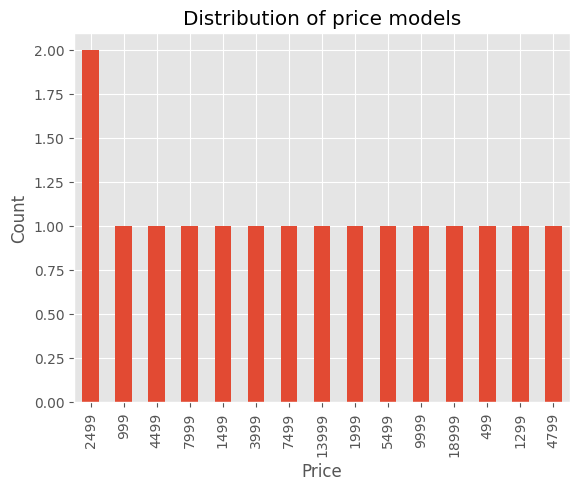

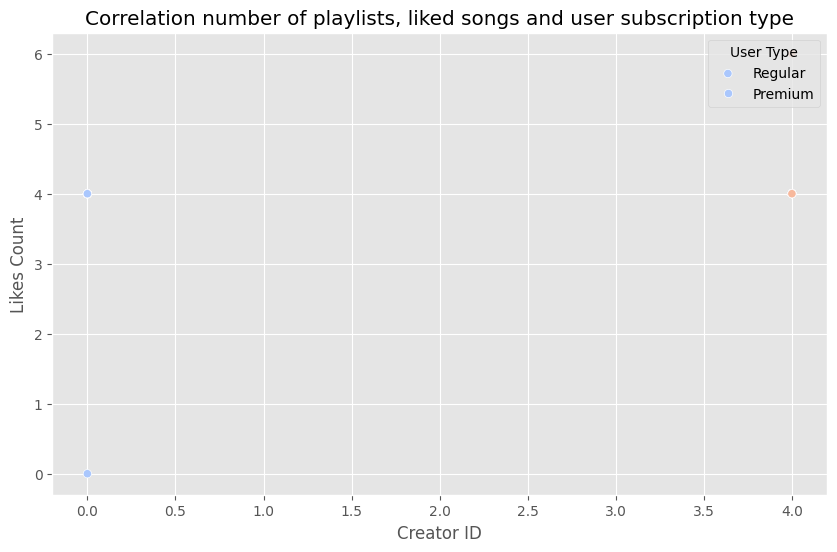

In [ ]:
# Top 10 most-followed artists.
df_followed_artists_merged = df_Artists_followers.merge(df_Artists, how='left', left_on='artist_id', right_on='id')
sorted_followed_artists = df_followed_artists_merged.groupby('name')["user_id"].count().sort_values(ascending=False)
sorted_followed_artists.reset_index().head(10)
# Top 10 most-liked songs
df_liked_songs_merged = df_Likes.merge(df_Songs, how="left", left_on="song_id", right_on="id")
sorted_liked_songs = df_liked_songs_merged.groupby('name')["user_id"].count().sort_values(ascending=False)
sorted_liked_songs.reset_index().head(10)

# Distribution of playlist sizes
songs_per_playlist = df_Playlist_tracks.groupby('playlists_id')["song_id"].count()
songs_per_playlist = songs_per_playlist.reset_index()
incremented_values = range(0, 15)
songs_per_playlist['song_count'] = songs_per_playlist['song_id'] + pd.Series(incremented_values)

songs_values = songs_per_playlist["song_count"].value_counts()
songs_values.plot(kind='bar')
plt.xlabel("Song count")
plt.ylabel("Number of occurences")
plt.title("Number of songs per playlist")

# Distribution of subscription plan prices
subscription_prices = df_Subscription_plan_info["price"].value_counts()
subscription_prices.plot(kind='bar')
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of price models")

# Most common genres
df_Artists.groupby(by="genre")["id"].count()

# Correlation analysis between user activity (e.g., number of playlists, likes) and subscription type.
df_users_playlists = df_Users.merge(df_Playlists, how='left', left_on='id', right_on='creator_id', suffixes=('_user','_playlist'))
df_users_corr = df_users_playlists.groupby(by='id_user')['creator_id'].count().reset_index()
df_users_corr['user_type'] = df_Users['user_type']

df_users_likes = df_Users.merge(df_Likes, how='left', left_on='id', right_on='user_id')
df_users_likes_grouped = df_users_likes.groupby(by='id')['song_id'].count().reset_index()
df_users_corr['likes_count'] = df_users_likes_grouped['song_id']
df_users_corr_copy = df_users_corr.copy()

df_users_corr.drop('id_user', axis=1, inplace=True)
df_users_corr['user_type'] = df_users_corr['user_type'].map({'premium': 1, 'regular': 0})
df_users_corr.corr()
df_users_corr

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_users_corr, x='creator_id', y='likes_count', hue='user_type', palette='coolwarm')
plt.xlabel('Creator ID')
plt.ylabel('Likes Count')
plt.title('Correlation number of playlists, liked songs and user subscription type')
plt.legend(title='User Type', loc='upper right', labels=['Regular', 'Premium'])
plt.show()

3. Trend Analyses

User registration trends over time (e.g., monthly/yearly trends).
Trends in subscription purchases by date.
Analysis of user engagement over time (e.g., playlist creation, song likes) - dont have the data.

In [ ]:
# User song registration trends over time (e.g., monthly/yearly trends).
df_Songs['release_date'] = pd.to_datetime(df_Songs['release_date'])
df_Songs['month'] = df_Songs['release_date'].dt.month
df_Songs['year'] = df_Songs['release_date'].dt.year

df_Songs_grouped_month = df_Songs.groupby(by='month')['id'].count().reset_index()

df_Songs_grouped_month.plot(kind='bar', x='month', y='id')
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Count of songs per month')

df_Songs_grouped_year = df_Songs.groupby(by='year')['id'].count().reset_index()

df_Songs_grouped_year.plot(kind='bar', x='year', y='id')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Count of songs per year')

# Trends in subscription purchases
df_User_subscriptions['start_date'] = pd.to_datetime(df_User_subscriptions['start_date'])
df_User_subscriptions['month'] = df_User_subscriptions['start_date'].dt.month
df_User_subscriptions['year'] = df_User_subscriptions['start_date'].dt.year

df_User_subscriptions_month_grouped = df_User_subscriptions.groupby(by='month')['id'].count().reset_index()

df_User_subscriptions_month_grouped.plot(kind='bar', x='month', y='id')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of subscriptions per month')

df_User_subscriptions_year_grouped = df_User_subscriptions.groupby(by='year')['id'].count().reset_index()

df_User_subscriptions_year_grouped.plot(kind='bar', x='year', y='id')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of subscriptions per year')

4. User Behavior Analyses

Average number of playlists per user.
Average number of followers per user and artist.
Average number of songs liked per user.
Identifying "power users" who create the most playlists or interact the most with the platform.
Segmentation of users based on behavior (e.g., light, medium, and heavy users).

In [ ]:
# Average number of playlists per user.
df_users_playlists_grouped = df_users_playlists.groupby(by='id_user')['id_playlist'].count().reset_index()
avg_num_playlist_per_user = df_users_playlists_grouped['id_playlist'].mean()
avg_num_playlist_per_user

# Average number of followers per user and artist.
df_follower_user_grouped = df_Followers_users.groupby(by='user_id1')['user_id2'].count().reset_index()
avg_num_follower_per_user = df_follower_user_grouped['user_id2'].mean()
avg_num_follower_per_user

# Average number of songs liked per user.
df_likes_grouped = df_Likes.groupby(by='user_id').count().reset_index()
avg_num_likes_per_user = df_likes_grouped['song_id'].mean()
avg_num_likes_per_user

# Identifying "power users" who create the most playlists or interact the most with the platform.
#df_users_corr_copy.drop('user_type', axis=1, inplace=True)
df_users_corr_copy['enganment'] = df_users_corr_copy['creator_id'] + df_users_corr_copy['likes_count']
# Power use is a user that has equal or more than 10 in enganment
power_user_id = df_users_corr_copy[df_users_corr_copy['enganment'] >= 10]
power_user_id['id_user'].to_list()

# Segmentation of users based on behavior (e.g., light, medium, and heavy users).
bins = [0, 5, 10, float('inf')]  # Define bin edges: 0-50 (low), 50-100 (mid), >100 (high)
labels = ['low', 'mid', 'high']

df_users_corr_copy['enganment_bins'] = pd.cut(df_users_corr_copy['enganment'], bins=bins, labels=labels, right=False)

df_users_corr_copy_values = df_users_corr_copy['enganment_bins'].value_counts()

df_users_corr_copy_values.plot(kind='bar')
plt.xlabel('Type of enganment')
plt.ylabel('Count')
plt.title('Number of users per enganment')

5. Playlists and Songs Analyses

Most frequently added songs to playlists.
Most popular playlists based on follower count.
Distribution of song popularity (e.g., number of likes per song).
Most common playlist genres.

In [ ]:
# Most frequently added songs to playlists.
songs_playlists_grouped = df_Playlist_tracks.groupby(by='song_id')['playlists_id'].count().sort_values(ascending=False).reset_index()
songs_name_playlists_grouped = songs_playlists_grouped.merge(df_Songs, how='left', left_on='song_id', right_on='id')
songs_name_playlists_grouped['name'].to_list()[0]

# Most popular playlists based on follower count.
#new_row = pd.DataFrame({'user_id': [1,2,3], 'playlists_id': [1,2,1]})
#df_Playlists_users = pd.concat([new_row, df_Playlists_users])
playlist_users_grouped = df_Playlists_users.groupby(by='user_id')['playlists_id'].count().sort_values(ascending=False).reset_index()
playlists_followers_name_grouped = playlist_users_grouped.merge(df_Playlists, how='left', left_on='playlists_id', right_on='id')
playlists_followers_name_grouped['name'][0]

# Distribution of song popularity (e.g., number of likes per song).
df_likes_grouped = df_Likes.groupby(by='song_id')['user_id'].count().reset_index()
df_likes_grouped.plot(kind='bar', x='song_id', y='user_id', figsize=(20, 12))
plt.xlabel('Song ID')
plt.ylabel('Count')
plt.title('Count of liked songs')

# Most common playlist genres.
df_playlists_tracks_merge = df_Playlists.merge(df_Playlist_tracks, how='left', left_on='id', right_on='playlists_id')
df_playlists_tracks_song_merge = df_playlists_tracks_merge.merge(df_Songs, how='left', left_on='song_id', right_on='id')
df_playlists_tracks_song_artists_merge = df_playlists_tracks_song_merge.merge(df_Artists, how='left', left_on='artist_id', right_on='id')
df_playlists_tracks_song_artists_merge.groupby(by='genre')['id_x'].count()

6. Financial Analyses

Total revenue generated from subscriptions and payments.
Average revenue per user (ARPU).
Monthly/quarterly revenue trends.
Retention analysis: How many users renew their subscriptions?
Analysis of subscription plans' popularity and contribution to revenue.